<a href="https://colab.research.google.com/github/Hyeonji1234/IPcolab/blob/main/ch04_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(360, 360, 3)


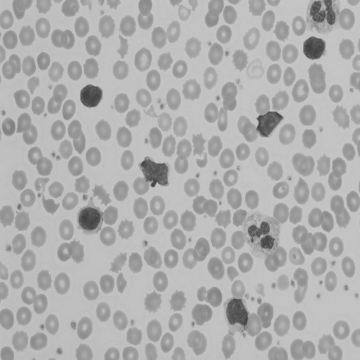

In [49]:
#img = cv2.imread('/content/gdrive/My Drive/digital/Images/lena256.jpg')
#img = cv2.imread('/content/gdrive/My Drive/digital/Images/rice.bmp')
img = cv2.imread('/content/gdrive/My Drive/digital/Images/cell.bmp')
#img = cv2.imread('/content/gdrive/My Drive/digital/Images/cell-bright.bmp')
#img = cv2.imread('/content/gdrive/My Drive/digital/Images/milkdrop.bmp')
print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

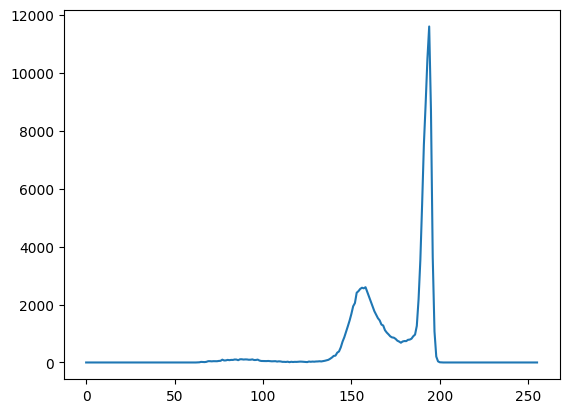

In [51]:
hist = cv2.calcHist([gimg1], [0], None, [256], [0, 255])
plt.plot(hist)

In [26]:
gBin = np. zeros((gimg1.shape[0], gimg1.shape[1]), dtype=np.ubyte)

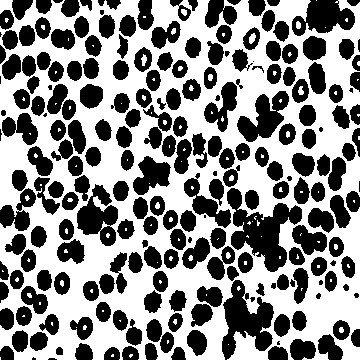

In [60]:
Threshold = 180
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if gimg1[h, w] > Threshold:
      gBin[h, w] = 255
    else:
      gBin[h, w] = 0

cv2_imshow(gBin)

In [64]:
T1 = 150
T2 = 0
T0 = 1

In [58]:
def threshold_update(img, bimg):
  sum1 = 0
  count1= 0
  sum2 = 0
  count2 = 1

  for h in range(img.shape[0]):
    for w in range(img.shape[1]):
      if(bimg[h, w] == 0):
        sum1 = np.int32(sum1 + img[h, w])
        count1 += 1
      else:
        sum2 = np.int32(sum2 + img[h, w])
        count2 += 1
  avg1 = sum1/count1
  avg2 = sum2/count2
  T = (avg1 + avg2)/2
  return T

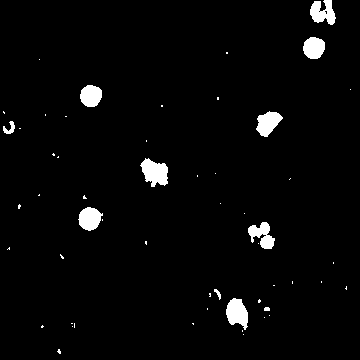

In [53]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if gimg1[h, w] > T1:
      gBin[h, w] = 0
    else:
      gBin[h, w] = 255

cv2_imshow(gBin)

171.86315775410515
171.59205151395986
171.59205151395986


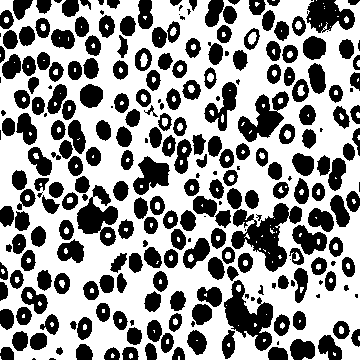

In [65]:
while True:
  T2 = threshold_update(gimg1, gBin)
  print(T2)

  if(np.abs(T1 - T2) < T0):
    break
  else:
    T1 = T2
    for h in range(gimg1.shape[0]):
      for w in range(gimg1.shape[1]):
        if gimg1[h, w] > T1:
          gBin[h, w] = 255
        else:
          gBin[h, w] = 0

print(T2)
cv2_imshow(gBin)